<h4>Import Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("boston.csv", delim_whitespace=True, header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.shape

(506, 14)

In [5]:
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
                 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


df.columns = feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


<h4>Preprocessing

In [6]:
X = df.drop('MEDV', axis = 1)
y = df['MEDV']

In [7]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X)
X.iloc[:, :] = scaler.transform(X)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

<h4>NN

In [9]:
def split_input(x):
    df_high_corr = x[["RM", "LSTAT"]]
    df_other = x[["CRIM", "ZN", "CHAS", "NOX", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B"]]
    return df_high_corr, df_other

In [10]:
X_train_high_corr, X_train_other = split_input(X_train)

In [11]:
from tensorflow import keras

In [12]:
#inputs
high_corr_input = keras.Input(shape=(2,), name="High Corr")
other_input = keras.Input(shape=(10,), name="Other")

#hidden
high_corr_features = keras.layers.Dense(128)(high_corr_input)
high_corr_features = keras.layers.Dropout(.2)(high_corr_features)
high_corr_features = keras.layers.Dense(64)(high_corr_features)
other_features = keras.layers.Dense(32)(other_input)
x = keras.layers.concatenate([high_corr_features, other_features])
x = keras.layers.Dense(48)(x)

#output
price_pred = keras.layers.Dense(1, name="Price")(x)

model = keras.Model(inputs=[high_corr_input, other_input], outputs=[price_pred])

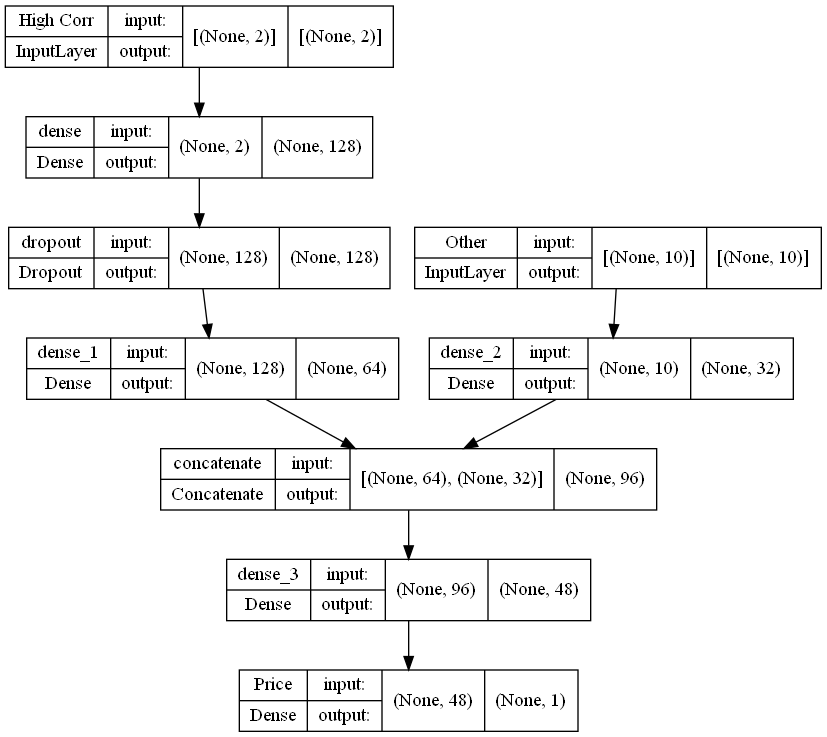

In [13]:
keras.utils.plot_model(model, "multi_input.png", show_shapes=True)

In [14]:
model.compile(optimizer="Adam", loss=["mse"], loss_weights=[1.0], metrics=['mae'])

In [15]:
history = model.fit(
    {"High Corr": X_train_high_corr, "Other": X_train_other},
    {"Price": y_train},
    epochs=100,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/100
3/3 [==============================] - 2s 82ms/step - loss: 587.2691 - mae: 22.5191 - val_loss: 628.1162 - val_mae: 23.4517
Epoch 2/100
3/3 [==============================] - 0s 13ms/step - loss: 571.9900 - mae: 22.4245 - val_loss: 607.5037 - val_mae: 23.2922
Epoch 3/100
3/3 [==============================] - 0s 12ms/step - loss: 554.8963 - mae: 22.2687 - val_loss: 587.2255 - val_mae: 23.1072
Epoch 4/100
3/3 [==============================] - 0s 10ms/step - loss: 540.2988 - mae: 22.1330 - val_loss: 566.0382 - val_mae: 22.8831
Epoch 5/100
3/3 [==============================] - 0s 13ms/step - loss: 523.2749 - mae: 21.9257 - val_loss: 544.7075 - val_mae: 22.6081
Epoch 6/100
3/3 [==============================] - 0s 13ms/step - loss: 506.1359 - mae: 21.6777 - val_loss: 523.3223 - val_mae: 22.2675
Epoch 7/100
3/3 [==============================] - 0s 13ms/step - loss: 489.9989 - mae: 21.3669 - val_loss: 502.3601 - val_mae: 21.8529
Epoch 8/100
3/3 [==============================]

3/3 [==============================] - 0s 13ms/step - loss: 27.4827 - mae: 3.6051 - val_loss: 20.1842 - val_mae: 3.0408
Epoch 63/100
3/3 [==============================] - 0s 12ms/step - loss: 29.2111 - mae: 3.6744 - val_loss: 20.1003 - val_mae: 3.0320
Epoch 64/100
3/3 [==============================] - 0s 12ms/step - loss: 29.4370 - mae: 3.7207 - val_loss: 20.1326 - val_mae: 3.0189
Epoch 65/100
3/3 [==============================] - 0s 12ms/step - loss: 29.2061 - mae: 3.6395 - val_loss: 20.4973 - val_mae: 3.0386
Epoch 66/100
3/3 [==============================] - 0s 12ms/step - loss: 28.3046 - mae: 3.6675 - val_loss: 20.7046 - val_mae: 3.0583
Epoch 67/100
3/3 [==============================] - 0s 13ms/step - loss: 28.6593 - mae: 3.7508 - val_loss: 20.4469 - val_mae: 3.0516
Epoch 68/100
3/3 [==============================] - 0s 13ms/step - loss: 28.2958 - mae: 3.7349 - val_loss: 19.7148 - val_mae: 3.0111
Epoch 69/100
3/3 [==============================] - 0s 11ms/step - loss: 26.6933 -

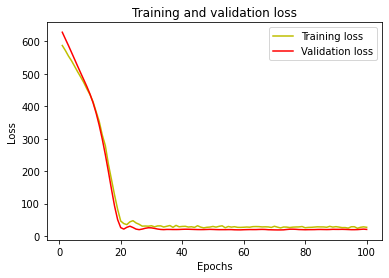

In [16]:
from matplotlib import pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

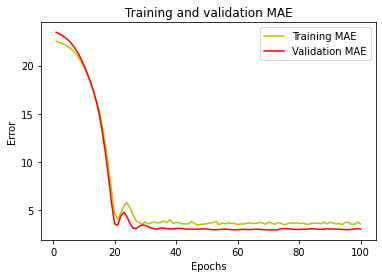

In [17]:
acc = history.history['mae']
val_acc = history.history['val_mae']

plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()

In [18]:
X_test_high_corr, X_test_other = split_input(X_test)

mse_neural, mae_neural = model.evaluate({"High Corr": X_test_high_corr, "Other": X_test_other}, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)

4/4 [==============================] - 0s 2ms/step - loss: 16.8569 - mae: 3.0071
Mean squared error from neural net:  16.85694122314453
Mean absolute error from neural net:  3.0071444511413574
